In [3]:
import os
from pathlib import Path
import shutil
import time

# clean dir
#shutil.rmtree('/kaggle/working')

# create folder for datasets if doesnt exists
if not os.path.exists("./dataset/banana/good"):
    os.makedirs("./dataset/banana/good")
if not os.path.exists("./dataset/banana/bad"):
    os.makedirs("./dataset/banana/bad")
if not os.path.exists("./dataset/apple/good"):
    os.makedirs("./dataset/apple/good")
if not os.path.exists("./dataset/apple/bad"):
    os.makedirs("./dataset/apple/bad")

# move relevant dataset to a folder
move_paths = [
    ['C:/Users/garib/.cache/kagglehub/datasets/ryandpark/fruit-quality-classification/versions/1/Good Quality_Fruits/Banana_Good', './dataset/banana/good'],
    ['C:/Users/garib/.cache/kagglehub/datasets/ryandpark/fruit-quality-classification/versions/1/Bad Quality_Fruits/Banana_Bad', './dataset/banana/bad'],
    ['C:/Users/garib/.cache/kagglehub/datasets/ryandpark/fruit-quality-classification/versions/1/Good Quality_Fruits/Apple_Good', './dataset/apple/good'],
    ['C:/Users/garib/.cache/kagglehub/datasets/ryandpark/fruit-quality-classification/versions/1/Bad Quality_Fruits/Apple_Bad', './dataset/apple/bad'],
    #['/kaggle/input/fruit-quality-classification/Good Quality_Fruits/Banana_Good/', '/kaggle/working/banana/good'],
    #['/kaggle/input/fruit-quality-classification/Bad Quality_Fruits/Banana_Bad/', '/kaggle/working/banana/bad']
] 

for move_path in move_paths:
    src_path = move_path[0]
    trg_path = move_path[1]
    for src_file in Path(src_path).glob('*.*'):
        shutil.copy(src_file, trg_path)

In [1]:
# dataset count
good_bananas = next(os.walk('./dataset/banana/good'))[2]
print('Good Bananas: ', len(good_bananas))

bad_bananas = next(os.walk('./dataset/banana/bad'))[2]
print('Bad Bananas: ', len(bad_bananas))

good_apples = next(os.walk('./dataset/apple/good'))[2]
print('Good Apples: ', len(good_apples))

bad_apples = next(os.walk('./dataset/apple/bad'))[2]
print('Bad Apples: ', len(bad_apples))

NameError: name 'os' is not defined

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [ ]:
# Split training and testing datasets

import random

def split_files(src_dir, train_file_count, test_dir, train_dir):
    # Get a list of all files in the source directory
    files = os.listdir(src_dir)

    # Shuffle the list of files
    random.shuffle(files)

    # Move the first `train_file_count` files to the train directory
    for i in range(train_file_count):
        file = files[i]
        src_path = os.path.join(src_dir, file)
        dst_path = os.path.join(train_dir, file)
        os.rename(src_path, dst_path)

    # Move the remaining files to the test directory
    for file in files[train_file_count:]:
        src_path = os.path.join(src_dir, file)
        dst_path = os.path.join(test_dir, file)
        os.rename(src_path, dst_path)

if not os.path.exists("./dataset/classbanana/test/banana"):
    os.makedirs("./dataset/classbanana/test/banana")
if not os.path.exists("./dataset/classbanana/train/banana"):
    os.makedirs("./dataset/classbanana/train/banana")
if not os.path.exists("./dataset/classbanana/test/maca"):
    os.makedirs("./dataset/classbanana/test/maca")
if not os.path.exists("./dataset/classbanana/train/maca"):
    os.makedirs("./dataset/classbanana/train/maca")

# Set the source directory and the destination directories
src_dir_good = './dataset/banana/'
test_dir_good = './dataset/classbanana/test/banana'
train_dir_good = './dataset/classbanana/train/banana'

src_dir_bad = './dataset/maca/'
test_dir_bad = './dataset/classbanana/test/maca'
train_dir_bad = './dataset/classbanana/train/maca'

split_files(src_dir_good, 1500, test_dir_good, train_dir_good)
split_files(src_dir_bad, 1500, test_dir_bad, train_dir_bad)

IndexError: list index out of range

In [63]:
labels = ['banana', 'maca']

In [64]:
import cv2, os, random

src_path = "./dataset/classbanana/train/maca_ori"
dst_path = "./dataset/classbanana/train/maca"
os.makedirs(dst_path, exist_ok=True)

for file in os.listdir(src_path):
    img = cv2.imread(os.path.join(src_path, file))
    h, w = img.shape[:2]
    # Crop aleatório 100x100
    x1, y1 = random.randint(0, w-100), random.randint(0, h-100)
    crop = img[y1:y1+100, x1:x1+100]
    cv2.imwrite(os.path.join(dst_path, f"neg_{file}"), crop)

In [65]:
# prepare dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255) 


train_path = './dataset/classbanana/train'
test_path = './dataset/classbanana/test'

train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 classes=labels,
                                                 target_size=(240,240), 
                                                 subset="training",
                                                 class_mode='binary')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=(240,240), 
                                                 subset="validation",
                                                 class_mode='binary')

Found 4045 images belonging to 2 classes.
Found 449 images belonging to 2 classes.


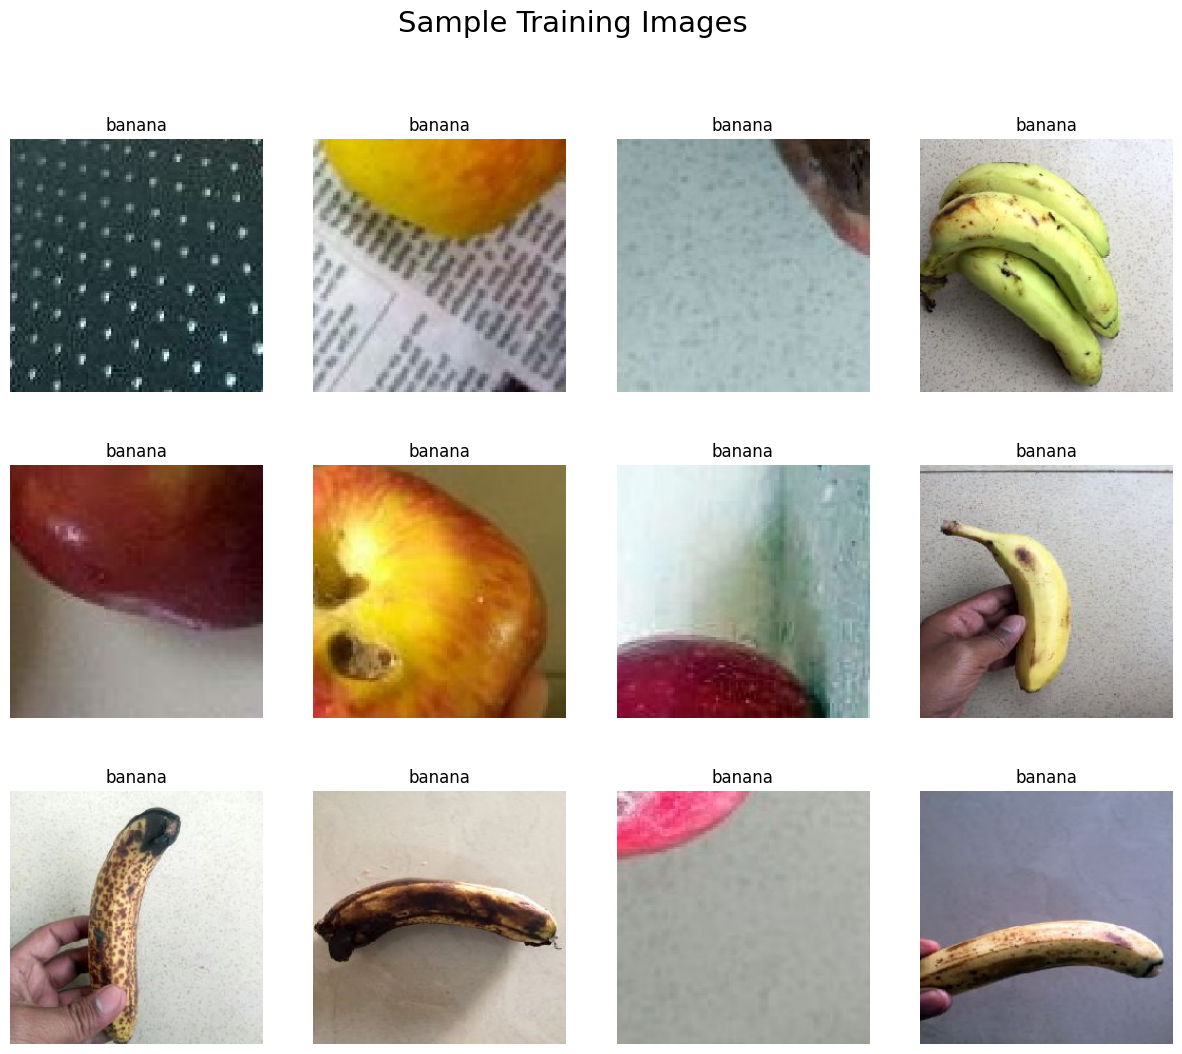

In [66]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [67]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Modelo base
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(240,240,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
preds = Dense(1, activation="sigmoid")(x)
modelo_banana = Model(inputs=base_model.input, outputs=preds)

# Congelar base
for layer in base_model.layers:
    layer.trainable = False

# Compilar e treinar
modelo_banana.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
modelo_banana.fit(train_dataset, validation_data=val_dataset, epochs=5)

# Salvar modelo
modelo_banana.save("modelo_detector_banana.h5")

C:\Users\garib\AppData\Local\Temp\ipykernel_6244\3181696981.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(240,240,3))


Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 55s 413ms/step - accuracy: 0.9795 - loss: 0.0732 - val_accuracy: 0.9733 - val_loss: 0.0682
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 34s 270ms/step - accuracy: 0.9998 - loss: 0.0075 - val_accuracy: 0.9688 - val_loss: 0.0660
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 34s 267ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9710 - val_loss: 0.0627
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 34s 267ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9800 - val_loss: 0.0472
Epoch 5/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 34s 266ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9800 - val_loss: 0.0456


In [68]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_path,
                                                  batch_size=1,
                                                  target_size=(240,240),
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='binary')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = modelo_banana.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 1490 images belonging to 2 classes.
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.8054 - loss: 0.4004
accuracy test:  0.8053691387176514
loss test:  0.4003930687904358


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


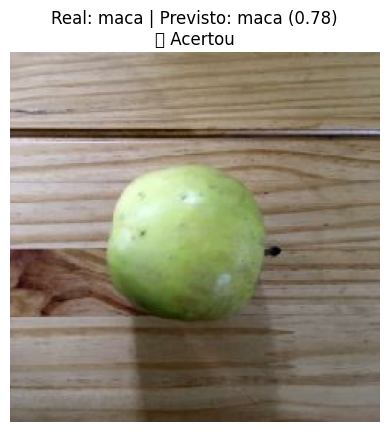

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Caminho do dataset de teste
test_path = "./dataset/test"


# Carregar modelo treinado
modelo_banana = load_model("modelo_detector_banana.h5")

# Escolher índice aleatório
idx = random.randint(0, len(test_generator.filenames) - 1)

# Obter a imagem e o rótulo
x, y_true = test_generator[idx]   # x tem shape (1, 240, 240, 3), y_true é array [0] ou [1]
y_true = int(y_true[0])

# Fazer previsão
y_pred_prob = modelo_banana.predict(x)[0][0]
y_pred = int(y_pred_prob > 0.5)

# Decodificar rótulos
true_label = labels[y_true]
pred_label = labels[y_pred]

# Resultado se acertou
resultado = "✅ Acertou" if y_true == y_pred else "❌ Errou"

# Mostrar imagem
plt.imshow(x[0])
plt.title(f"Real: {true_label} | Previsto: {pred_label} ({y_pred_prob:.2f})\n{resultado}")
plt.axis("off")
plt.show()
